In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set_style("darkgrid") 
import gc
import itertools
from datetime import datetime
import dash
from dash import dcc, html
np.random.seed(42)
import plotly
from datetime import datetime, timedelta
import plotly.offline as pyoff
import plotly.graph_objs as go
#initiate visualization library for jupyter notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
pyoff.init_notebook_mode(connected=True)
%matplotlib inline

In [3]:
customers = pd.read_csv('./archive/olist_customers_dataset.csv')
order_items = pd.read_csv('./archive/olist_order_items_dataset.csv')
order_payments = pd.read_csv('./archive/olist_order_payments_dataset.csv')
orders = pd.read_csv('./archive/olist_orders_dataset.csv')

In [19]:
# displaying data shape
#dataset = [customers, geolocation, order_items, order_payments, order_reviews, orders, products, sellers, category_name_translation]
dataset = {
    'Customers': customers,
    'Order Items': order_items,
    'Payments': order_payments,
    'Orders': orders
}
# for x, y in dataset.items():
#     print(f'{x}', (list(y.shape)))


(103886, 5)

In [ ]:
# displaying dataset column names
for x, y in dataset.items():
    print(f'{x}', f'{list(y.columns)}\n')

Customers ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']

Order Items ['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']

Payments ['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']

Orders ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']



In [ ]:
# checking for null values in datasets
for x, y in dataset.items():
    print(f'{x}: {y.isnull().any().any()}')

Customers: False
Order Items: False
Payments: False
Orders: True


In [ ]:
# taking count for dataset with missing values
for x, y in dataset.items():
    if y.isnull().any().any():
        print(f'{x}', (list(y.shape)),'\n')
        print(f'{y.isnull().sum()}\n')

Orders [99441, 8] 

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64



In [25]:
# creating master dataframe
order_payments.head()
df1 = order_payments.merge(order_items, on='order_id')
df2 = df1.merge(orders, on='order_id')
df = df2.merge(customers, on='customer_id')
print(df.shape)

(117601, 22)


In [27]:
# df.head()
df.shape

(117601, 22)

In [28]:
# converting date columns to datetime
date_columns = ['shipping_limit_date', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%d %H:%M:%S')

In [29]:
# cleaning up name columns
df['customer_city'] = df['customer_city'].str.title()
df['payment_type'] = df['payment_type'].str.replace('_', ' ').str.title()
# engineering new/essential columns
df['delivery_against_estimated'] = (df['order_estimated_delivery_date'] - df['order_delivered_customer_date']).dt.days
df['order_purchase_year'] = df.order_purchase_timestamp.apply(lambda x: x.year)
df['order_purchase_month'] = df.order_purchase_timestamp.apply(lambda x: x.month)
df['order_purchase_dayofweek'] = df.order_purchase_timestamp.apply(lambda x: x.dayofweek)
df['order_purchase_hour'] = df.order_purchase_timestamp.apply(lambda x: x.hour)
df['order_purchase_day'] = df['order_purchase_dayofweek'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
df['order_purchase_mon'] = df.order_purchase_timestamp.apply(lambda x: x.month).map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
# Changing the month attribute for correct ordenation
df['month_year'] = df['order_purchase_month'].astype(str).apply(lambda x: '0' + x if len(x) == 1 else x)
df['month_year'] = df['order_purchase_year'].astype(str) + '-' + df['month_year'].astype(str)
#creating year month column
df['month_y'] = df['order_purchase_timestamp'].map(lambda date: 100*date.year + date.month)

In [30]:
# displaying summary staticstics of columns
df.describe(include='all')

C:\Users\nazm1\AppData\Local\Temp\ipykernel_69940\713982304.py:2: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.

C:\Users\nazm1\AppData\Local\Temp\ipykernel_69940\713982304.py:2: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.

C:\Users\nazm1\AppData\Local\Temp\ipykernel_69940\713982304.py:2: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.

C:\Users\nazm1\AppData\Local\Temp\ipykernel_69940\71398

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,delivery_against_estimated,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour,order_purchase_day,order_purchase_mon,month_year,month_y
count,117601,117601.000000,117601,117601.000000,117601.000000,117601.000000,117601,117601,117601,117601.000000,117601.000000,117601,117601,117601,117586,116356,115034,117601,117601,117601.000000,117601,117601,115034.000000,117601.000000,117601.000000,117601.000000,117601.000000,117601,117601,117601,117601.000000
unique,98665,NaN,4,NaN,NaN,NaN,32951,3095,93317,NaN,NaN,98665,7,98111,90173,81016,95663,449,95419,NaN,4110,27,NaN,NaN,NaN,NaN,NaN,7,12,24,NaN
top,895ab968e7bb0d5659d16cd74cd1650c,NaN,Credit Card,NaN,NaN,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,2017-08-14 20:43:31,NaN,NaN,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-12-20 00:00:00,9a736b248f67d166d2fbb006bcb877c3,NaN,Sao Paulo,SP,NaN,NaN,NaN,NaN,NaN,Mon,Aug,2017-11,NaN
freq,63,NaN,86769,NaN,NaN,NaN,536,2133,63,NaN,NaN,63,115035,63,63,63,63,649,75,NaN,18590,49566,NaN,NaN,NaN,NaN,NaN,19130,12632,9016,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-19 00:15:34,NaN,NaN,NaN,NaN,2016-09-04 21:15:19,2016-10-04 09:43:32,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-09 22:35:08,NaN,NaN,NaN,NaN,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.093528,NaN,2.939482,172.686752,1.195900,NaN,NaN,NaN,120.824783,20.045990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35051.793097,NaN,NaN,11.043326,2017.538193,6.028129,2.745750,14.760002,NaN,NaN,NaN,201759.847399
std,NaN,0.726692,NaN,2.774223,267.592290,0.697706,NaN,NaN,NaN,184.479323,15.861315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29820.588877,NaN,NaN,10.162307,0.505065,3.229579,1.961257,5.325670,NaN,NaN,NaN,48.798820
min,NaN,1.000000,NaN,0.000000,0.000000,1.000000,NaN,NaN,NaN,0.850000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1003.000000,NaN,NaN,-189.000000,2016.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,201609.000000
25%,NaN,1.000000,NaN,1.000000,60.870000,1.000000,NaN,NaN,NaN,39.900000,13.080000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11310.000000,NaN,NaN,6.000000,2017.000000,3.000000,1.000000,11.000000,NaN,NaN,NaN,201709.000000


In [32]:
# displaying missing value counts and corresponding percentage against total observations

missing_values = df.isnull().sum().sort_values(ascending = False)
percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([missing_values, percentage], axis=1, keys=['Values', 'Percentage']).transpose()

,order_id,order_delivered_customer_date,month_year,order_purchase_mon,order_purchase_day,order_purchase_hour,order_purchase_dayofweek,order_purchase_month,order_purchase_year,delivery_against_estimated,customer_state,customer_city,customer_zip_code_prefix,customer_unique_id,order_estimated_delivery_date,order_delivered_carrier_date,payment_sequential,order_approved_at,order_purchase_timestamp,order_status,customer_id,freight_value,price,shipping_limit_date,seller_id,product_id,order_item_id,payment_value,payment_installments,payment_type,month_y
Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percentage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# dropping missing values
df.dropna(inplace=True)
df.isnull().values.any()

False

In [34]:
# displaying dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115018 entries, 0 to 117600
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115018 non-null  object        
 1   payment_sequential             115018 non-null  int64         
 2   payment_type                   115018 non-null  object        
 3   payment_installments           115018 non-null  int64         
 4   payment_value                  115018 non-null  float64       
 5   order_item_id                  115018 non-null  int64         
 6   product_id                     115018 non-null  object        
 7   seller_id                      115018 non-null  object        
 8   shipping_limit_date            115018 non-null  datetime64[ns]
 9   price                          115018 non-null  float64       
 10  freight_value                  115018 non-null  float64       
 11  

In [35]:
# excluding incomplete 2012 data and displaying first 3 rows of master dataframe
df = df.query("month_year != '2016-12' and month_year != '2016-10'")
df.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,delivery_against_estimated,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour,order_purchase_day,order_purchase_mon,month_year,month_y
0,b81ef226f3fe1789b1e8b2acac839d17,1,Credit Card,8,99.33,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,708ab75d2a007f0564aedd11139c7708,39801,Teofilo Otoni,MG,12.0,2018,4,2,22,Wed,Apr,2018-04,201804
1,a9810da82917af2d9aefd1278f1dcfa0,1,Credit Card,1,24.39,1,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,7.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,a8b9d3a27068454b1c98cc67d4e31e6f,2422,Sao Paulo,SP,16.0,2018,6,1,11,Tue,Jun,2018-06,201806
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,Credit Card,1,65.71,1,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,8.72,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04,6f70c0b2f7552832ba46eb57b1c5651e,2652,Sao Paulo,SP,16.0,2017,12,1,11,Tue,Dec,2017-12,201712


##Customer Segmentation

Customers who shop on Olist have different needs and they have their own different profile. We should adapt our actions depending on that.

RFM stands for Recency - Frequency - Monetary Value, I will be using this metrics to segment customers. Theoretically we will have segments like below: Low Value: Customers who are less active than others, not very frequent buyer/visitor and generates very low - zero - maybe negative revenue. Mid Value: In the middle of everything. Often using our platform (but not as much as our High Values), fairly frequent and generates moderate revenue. High Value: The group we don’t want to lose. High Revenue, Frequency and low Inactivity.

In [36]:
rfm = df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (pd.to_datetime('2018-08-29 15:00:37') - pd.to_datetime(x.max())).days,
    'order_id': 'count',
    'payment_value': 'sum'
}).reset_index()

rfm.columns = ['customer_id', 'Recency', 'Frequency', 'Monetary']

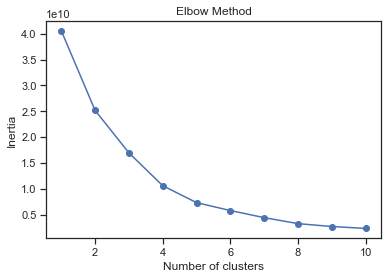

In [37]:
from sklearn.cluster import KMeans
# Apply KMeans clustering and use the elbow method to find the optimal number of clusters
inertia = []
X = rfm.drop(columns=['customer_id'])
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [39]:
rfm.describe()

,Recency,Frequency,Monetary
count,93083.000000,93083.000000,93083.000000
mean,235.664117,1.232029,211.754922
std,150.901762,0.819779,642.781688
min,0.000000,1.000000,9.590000
25%,113.000000,1.000000,63.730000
50%,217.000000,1.000000,112.940000
75%,344.000000,1.000000,201.650000
max,601.000000,75.000000,109312.640000


In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Normalize the variables
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Apply K-means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(rfm_scaled)

# Add cluster labels to the dataframe
rfm['Cluster'] = kmeans.labels_

# Analyze the clusters
cluster_analysis = rfm.groupby('Cluster').agg({
    'Recency': ['mean','max','min'],
    'Frequency': ['mean','max','min'],
    'Monetary': ['mean','max','min'],
    'customer_id': 'count'
}).reset_index()

In [41]:
print(cluster_analysis)

  Cluster     Recency            Frequency               Monetary             \
                 mean  max  min       mean max min           mean        max   
0       0  126.360140  254    0   1.113322   2   1     169.258510    3526.46   
1       1  228.812500  601    0   3.904444  22   1    1013.846903    8891.00   
2       2  383.476254  601  254   1.119569   3   1     169.654201    4042.74   
3       3  220.169231  575   17  12.753846  75   3   12337.741077   45256.00   
4       4  333.000000  333  333   8.000000   8   8  109312.640000  109312.64   

             customer_id  
         min       count  
0       9.59       51305  
1      17.38        3600  
2      10.07       38112  
3      62.68          65  
4  109312.64           1  


In [42]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the 'Recency', 'Frequency', and 'Monetary' variables
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Convert the scaled array back to a DataFrame
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled'])

# Concatenate the scaled DataFrame with the original DataFrame
rfm = pd.concat([rfm, rfm_scaled_df], axis=1)

In [43]:
rfm_scaled_df['customer_id'] = rfm['customer_id']

In [187]:
####Partie Dash
import plotly.express as px
from dash import dash_table
import dash_bootstrap_components as dbc
from dash.dependencies import Input, Output
import plotly.graph_objs as go

c:\Users\nazm1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



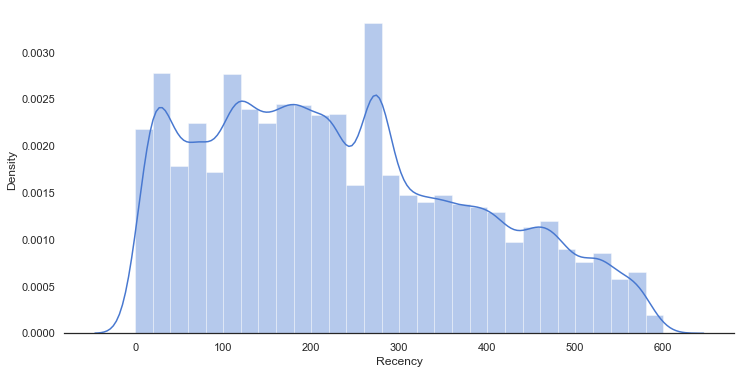

In [189]:
sns.set_style("darkgrid") 
sns.set(palette='muted', color_codes=True, style='white')
fig, ax = plt.subplots(figsize=(12, 6))
sns.despine(left=True)
sns.distplot(rfm['Recency'], bins=30)

# Convertir le graphique matplotlib en objet Plotly
plotly_fig2 = go.Figure()
for trace in plt.gca().get_lines():
    plotly_fig2.add_trace(go.Scatter(x=trace.get_xdata(), y=trace.get_ydata(), mode='lines+markers', name=trace.get_label()))


plotly_fig2.update_layout(
    title='rfm[Recency]',
    xaxis_title='Recency',
    yaxis_title='Density'
)
# Fermer le graphique matplotlib pour empêcher son affichage
plt.close()
# plt.show()

In [191]:
sns.set(palette='muted', color_codes=True, style='white')
fig, ax = plt.subplots(figsize=(12, 6))
sns.despine(left=True)
sns.distplot(rfm['Frequency'], bins=5)
plt.grid(True)

# Convertir le graphique matplotlib en objet Plotly
plotly_fig3 = go.Figure()
for trace in plt.gca().get_lines():
    plotly_fig3.add_trace(go.Scatter(x=trace.get_xdata(), y=trace.get_ydata(), mode='lines+markers', name=trace.get_label()))

plotly_fig3.update_layout(
    title='rfm[Frequency]',
    xaxis_title='Frequency',
    yaxis_title='Density'
)

# Fermer le graphique matplotlib pour empêcher son affichage
plt.close()

c:\Users\nazm1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



In [192]:
# Créer un autre graphique matplotlib
sns.set(palette='muted', color_codes=True, style='white')
fig, ax = plt.subplots(figsize=(12, 6))
sns.despine(left=True)
sns.distplot(rfm['Monetary'], bins=5)
plt.grid(True)

# Convertir le graphique matplotlib en objet Plotly
plotly_fig4 = go.Figure()
for trace in plt.gca().get_lines():
    plotly_fig4.add_trace(go.Scatter(x=trace.get_xdata(), y=trace.get_ydata(), mode='lines', name=trace.get_label()))

plotly_fig4.update_layout(
    title='rfm[Monetary]',
    xaxis_title='Monetary',
    yaxis_title='Density'
)

# Fermer le graphique matplotlib pour empêcher son affichage
plt.close()

c:\Users\nazm1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



In [ ]:
rfm.head()

,customer_id,Recency,Frequency,Monetary,Cluster,Recency_scaled,Frequency_scaled,Monetary_scaled
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,0,-0.826132,-0.283041,-0.108677
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,0,-0.806251,-0.283041,-0.287136
2,0000f46a3911fa3c0805444483337064,536,1,86.22,2,1.990285,-0.283041,-0.195301
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,2,0.558882,-0.283041,-0.261575
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89,2,0.340196,-0.283041,-0.023126


In [196]:
def num_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.05)
    q3 = df_in[col_name].quantile(0.95)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    outliers_df= df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]
    return print("Number of outliers in {} column: ".format(col_name), len(outliers_df)), print("Indexes: ", outliers_df.index)

In [197]:
for i in ["Recency", "Frequency", "Monetary"]:
    num_outlier(rfm, i)
    print("*"*40)

Number of outliers in Recency column:  0
Indexes:  Int64Index([], dtype='int64')
****************************************
Number of outliers in Frequency column:  1686
Indexes:  Int64Index([   22,   154,   221,   226,   247,   256,   357,   367,   484,
              502,
            ...
            92438, 92547, 92560, 92814, 92828, 92854, 92883, 92904, 92990,
            93071],
           dtype='int64', length=1686)
****************************************
Number of outliers in Monetary column:  1022
Indexes:  Int64Index([  129,   221,   255,   288,   415,   537,   569,   606,   612,
              703,
            ...
            92730, 92735, 92762, 92810, 92854, 92904, 92923, 92988, 93071,
            93078],
           dtype='int64', length=1022)
****************************************


In [198]:
rfm.shape

(93083, 8)

In [199]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.05)
    q3 = df_in[col_name].quantile(0.95)
    iqr = q3-q1
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    index_outliers= df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)].index
    df_in= pd.DataFrame(df_in.drop(index_outliers.to_list(), axis=0, inplace=True))
    print("Outliers in the {} column have been removed".format(col_name))
    return df_in

In [200]:
for i in ["Recency", "Monetary"]:
    remove_outlier(rfm, i)
    print("*"*40)

Outliers in the Recency column have been removed
****************************************
Outliers in the Monetary column have been removed
****************************************


In [201]:
rfm.shape

(92061, 8)

In [202]:
RFM_df2= rfm.copy()
RFM_df2= RFM_df2.set_index('customer_id')
RFM_df2

,Recency,Frequency,Monetary,Cluster,Recency_scaled,Frequency_scaled,Monetary_scaled
customer_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,0,-0.826132,-0.283041,-0.108677
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,0,-0.806251,-0.283041,-0.287136
0000f46a3911fa3c0805444483337064,536,1,86.22,2,1.990285,-0.283041,-0.195301
0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,2,0.558882,-0.283041,-0.261575
0004aac84e0df4da2b147fca70cf8255,287,1,196.89,2,0.340196,-0.283041,-0.023126
...,...,...,...,...,...,...,...
fffbf87b7a1a6fa8b03f081c5f51a201,244,1,167.32,0,0.055241,-0.283041,-0.069129
fffea47cd6d3cc0a88bd621562a9d061,261,1,84.58,2,0.167897,-0.283041,-0.197852
ffff371b4d645b6ecea244b27531430a,567,1,112.46,2,2.195718,-0.283041,-0.154478


In [203]:
RFM_df2["recency_score"]  = pd.qcut(RFM_df2['Recency'], 5, labels=[5, 4, 3, 2, 1])
RFM_df2["frequency_score"]= pd.qcut(RFM_df2['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
RFM_df2["monetary_score"] = pd.qcut(RFM_df2['Monetary'], 5, labels=[1, 2, 3, 4, 5])

In [204]:
RFM_df2['RFM_SCORE'] = RFM_df2.recency_score.astype(str)+ RFM_df2.frequency_score.astype(str) + RFM_df2.monetary_score.astype(str)
RFM_df2

,Recency,Frequency,Monetary,Cluster,Recency_scaled,Frequency_scaled,Monetary_scaled,recency_score,frequency_score,monetary_score,RFM_SCORE
customer_id,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,0,-0.826132,-0.283041,-0.108677,4,1,4,414
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,0,-0.806251,-0.283041,-0.287136,4,1,1,411
0000f46a3911fa3c0805444483337064,536,1,86.22,2,1.990285,-0.283041,-0.195301,1,1,2,112
0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,2,0.558882,-0.283041,-0.261575,2,1,1,211
0004aac84e0df4da2b147fca70cf8255,287,1,196.89,2,0.340196,-0.283041,-0.023126,2,1,4,214
...,...,...,...,...,...,...,...,...,...,...,...
fffbf87b7a1a6fa8b03f081c5f51a201,244,1,167.32,0,0.055241,-0.283041,-0.069129,3,5,4,354
fffea47cd6d3cc0a88bd621562a9d061,261,1,84.58,2,0.167897,-0.283041,-0.197852,3,5,2,352
ffff371b4d645b6ecea244b27531430a,567,1,112.46,2,2.195718,-0.283041,-0.154478,1,5,3,153


In [205]:
seg_map= {
    r'111|112|121|131|141|151': 'Lost customers',
    r'332|322|233|232|223|222|132|123|122|212|211': 'Hibernating customers',
    r'155|154|144|214|215|115|114|113': 'Cannot Lose Them',
    r'255|254|245|244|253|252|243|242|235|234|225|224|153|152|145|143|142|135|134|133|125|124': 'At Risk',
    r'331|321|312|221|213|231|241|251': 'About To Sleep',
    r'535|534|443|434|343|334|325|324': 'Need Attention',
    r'525|524|523|522|521|515|514|513|425|424|413|414|415|315|314|313': 'Promising',
    r'512|511|422|421|412|411|311': 'New Customers',
    r'553|551|552|541|542|533|532|531|452|451|442|441|431|453|433|432|423|353|352|351|342|341|333|323': 'Potential Loyalist',
    r'543|444|435|355|354|345|344|335': 'Loyal',
    r'555|554|544|545|454|455|445': 'Champions'
}

In [206]:
RFM_df2['Segment'] = RFM_df2['recency_score'].astype(str) + RFM_df2['frequency_score'].astype(str) + RFM_df2['monetary_score'].astype(str)
RFM_df2['Segment'] = RFM_df2['Segment'].replace(seg_map, regex=True)
RFM_df2.head()

,Recency,Frequency,Monetary,Cluster,Recency_scaled,Frequency_scaled,Monetary_scaled,recency_score,frequency_score,monetary_score,RFM_SCORE,Segment
customer_id,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,0,-0.826132,-0.283041,-0.108677,4,1,4,414,Promising
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,0,-0.806251,-0.283041,-0.287136,4,1,1,411,New Customers
0000f46a3911fa3c0805444483337064,536,1,86.22,2,1.990285,-0.283041,-0.195301,1,1,2,112,Lost customers
0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,2,0.558882,-0.283041,-0.261575,2,1,1,211,Hibernating customers
0004aac84e0df4da2b147fca70cf8255,287,1,196.89,2,0.340196,-0.283041,-0.023126,2,1,4,214,Cannot Lose Them


In [207]:
RFM_df2['Segment'].unique()

array(['Promising', 'New Customers', 'Lost customers',
       'Hibernating customers', 'Cannot Lose Them', 'Loyal',
       'About To Sleep', 'At Risk', 'Potential Loyalist', 'Champions',
       'Need Attention'], dtype=object)

In [208]:
RFM_df2['Segment'].nunique()

11

In [209]:
RFMStats = RFM_df2[["Segment", "Recency", "Frequency", "Monetary"]].groupby("Segment").agg(['mean','median', 'min', 'max', 'count'])
RFMStats

Recency                         Frequency         \
                             mean median  min  max  count      mean median   
Segment                                                                      
About To Sleep         273.446541  276.0  177  379   5883  1.031277    1.0   
At Risk                379.692785  360.0  268  601  14830  1.304248    1.0   
Cannot Lose Them       438.001451  441.0  268  599   6201  1.473149    1.0   
Champions               85.257084   82.0    0  176   6741  1.914998    2.0   
Hibernating customers  337.887463  323.0  177  595   9037  1.000000    1.0   
Lost customers         470.135687  465.0  380  601   4702  1.039770    1.0   
Loyal                  179.635311  195.0    0  267   6134  1.463319    1.0   
Need Attention         156.639943  175.0    0  267   5588  1.000000    1.0   
New Customers          122.456970  126.0    0  267   5624  1.000000    1.0   
Potential Loyalist     129.173962  128.0    0  267  15969  1.127184    1.0   
Promising              103.486258   87.5    0  267  11352  1.000000    1.0   

                                        Monetary                            \
                      min max  count        mean   median     min      max   
Segment                                                                      
About To Sleep          1   9   5883   53.041124   45.000   10.07   138.05   
At Risk                 1  38  14830  240.978198  162.560   55.52  1590.25   
Cannot Lose Them        1  75   6201  296.839655  204.540   89.02  1592.64   
Champions               1  24   6741  400.928533  295.880  138.10  1594.76   
Hibernating customers   1   1   9037   79.034767   74.870   11.63   138.08   
Lost customers          1   8   4702   45.459985   43.760   12.28    88.74   
Loyal                   1  13   6134  319.463045  231.120   88.78  1589.44   
Need Attention          1   1   5588  204.104458  164.320   88.86  1555.23   
New Customers           1   1   5624   52.469008   50.335   13.29    88.76   
Potential Loyalist      1  22  15969   75.117938   71.140    9.59   138.08   
Promising               1   1  11352  198.836624  149.860   14.06  1586.47   

                              
                       count  
Segment                       
About To Sleep          5883  
At Risk                14830  
Cannot Lose Them        6201  
Champions               6741  
Hibernating customers   9037  
Lost customers          4702  
Loyal                   6134  
Need Attention          5588  
New Customers           5624  
Potential Loyalist     15969  
Promising              11352

In [210]:
RFMStats['Ratio']= (100*RFMStats['Monetary']["count"]/RFMStats['Monetary']["count"].sum()).round(2)
RFMStats

Recency                         Frequency         \
                             mean median  min  max  count      mean median   
Segment                                                                      
About To Sleep         273.446541  276.0  177  379   5883  1.031277    1.0   
At Risk                379.692785  360.0  268  601  14830  1.304248    1.0   
Cannot Lose Them       438.001451  441.0  268  599   6201  1.473149    1.0   
Champions               85.257084   82.0    0  176   6741  1.914998    2.0   
Hibernating customers  337.887463  323.0  177  595   9037  1.000000    1.0   
Lost customers         470.135687  465.0  380  601   4702  1.039770    1.0   
Loyal                  179.635311  195.0    0  267   6134  1.463319    1.0   
Need Attention         156.639943  175.0    0  267   5588  1.000000    1.0   
New Customers          122.456970  126.0    0  267   5624  1.000000    1.0   
Potential Loyalist     129.173962  128.0    0  267  15969  1.127184    1.0   
Promising              103.486258   87.5    0  267  11352  1.000000    1.0   

                                        Monetary                            \
                      min max  count        mean   median     min      max   
Segment                                                                      
About To Sleep          1   9   5883   53.041124   45.000   10.07   138.05   
At Risk                 1  38  14830  240.978198  162.560   55.52  1590.25   
Cannot Lose Them        1  75   6201  296.839655  204.540   89.02  1592.64   
Champions               1  24   6741  400.928533  295.880  138.10  1594.76   
Hibernating customers   1   1   9037   79.034767   74.870   11.63   138.08   
Lost customers          1   8   4702   45.459985   43.760   12.28    88.74   
Loyal                   1  13   6134  319.463045  231.120   88.78  1589.44   
Need Attention          1   1   5588  204.104458  164.320   88.86  1555.23   
New Customers           1   1   5624   52.469008   50.335   13.29    88.76   
Potential Loyalist      1  22  15969   75.117938   71.140    9.59   138.08   
Promising               1   1  11352  198.836624  149.860   14.06  1586.47   

                              Ratio  
                       count         
Segment                              
About To Sleep          5883   6.39  
At Risk                14830  16.11  
Cannot Lose Them        6201   6.74  
Champions               6741   7.32  
Hibernating customers   9037   9.82  
Lost customers          4702   5.11  
Loyal                   6134   6.66  
Need Attention          5588   6.07  
New Customers           5624   6.11  
Potential Loyalist     15969  17.35  
Promising              11352  12.33

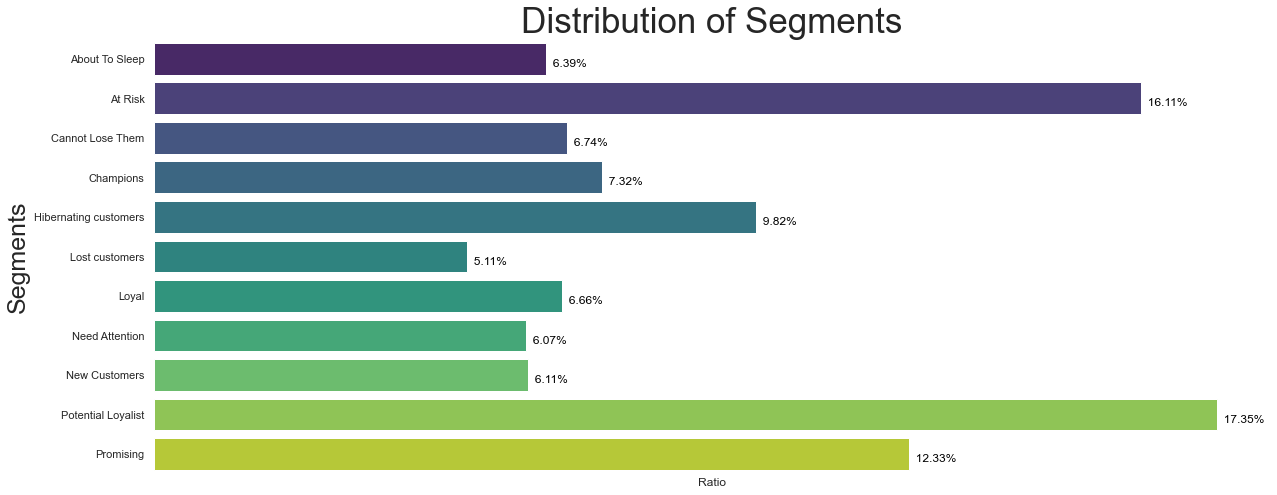

In [312]:
plt.figure(figsize=(20,8))
#plt.rc('font', size=20)
per= sns.barplot(x=RFMStats['Ratio'], y=RFMStats.Label, data=RFMStats, palette="viridis")
sns.despine(bottom = True, left = True)
for i, v in enumerate(RFMStats['Ratio']):
    per.text(v, i+.20,"  {:.2f}".format(v)+"%", color='black', ha="left")
per.set_ylabel('Segments', fontsize=25)
per.set(xticks=[])
plt.title('Distribution of Segments', fontsize=35)
plt.show()

In [324]:
import plotly.express as px

# Supposons que RFMStats est un DataFrame avec une colonne 'Ratio' et que l'index contient les segments
# Convertissez d'abord l'index en une colonne si ce n'est pas déjà fait
RFMStats_reset = RFMStats.reset_index()  # Renommez 'index' si nécessaire pour refléter le nom réel de votre colonne des segments

fig_ratio = px.bar(RFMStats_reset, y='Label', x='Ratio', orientation='h', 
             text='Ratio',  # Ceci ajoutera le texte sur les barres
             color='Ratio',  # Colorer les barres basées sur la valeur de 'Ratio'
             color_continuous_scale='viridis',  # Utilisation de la palette 'viridis'
             labels={'index': 'Segments', 'Ratio': ''},  # Renommez les axes si nécessaire
             title='Distribution of Segments',
            )


# Mettre à jour le texte pour afficher le pourcentage avec deux décimales
fig_ratio.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

# Personnaliser l'apparence, y compris le titre de l'axe Y
fig_ratio.update_layout(
    xaxis=dict(showticklabels=False),  # Masquer les ticklabels de l'axe x
    yaxis_title='Segments',  # Définir le titre de l'axe y
    xaxis_title='Ratio',  # Définir le titre de l'axe y
    title_font=dict(size=35),  # Ajuster la taille du titre
    plot_bgcolor='rgba(0,0,0,0)',  # Fond transparent
)

fig.show()

#fig.show()

In [307]:
import matplotlib.pyplot as plt

# Count the number of customers in each recency cluster
cluster_counts = rfm['Cluster'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(cluster_counts.index, cluster_counts.values, color='skyblue')
plt.xlabel('Recency Cluster')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers Across Recency Clusters')
plt.xticks(cluster_counts.index)
plt.grid(True)

# Convertir le graphique matplotlib en objet Plotly
plotly_fig5 = go.Figure(data=[
    go.Bar(x=cluster_counts.index, y=cluster_counts.values, marker_color='skyblue')
])

plotly_fig5.update_layout(
    title='Distribution of Customers Across Recency Clusters',
    xaxis_title='Recency clusters',
    yaxis_title='Number of Customers'
)

# Fermer le graphique matplotlib pour empêcher son affichage
plt.close()


In [52]:
rfm.to_csv('clusters.csv')

In [ ]:
clus = pd.read_csv('clusters.csv')

clus.head(3)

In [77]:
products = pd.read_csv('archive\olist_products_dataset.csv')
product_category = pd.read_csv('archive\product_category_name_translation.csv')

products_category_merged = pd.merge(products, product_category, on='product_category_name')
# products_category_merged.shape
# products_category_merged.isnull().any().any()
print(f'{products_category_merged.isnull().sum()}\n')

# products_category_merged.tail(100)

product_id                       0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 1
product_length_cm                1
product_height_cm                1
product_width_cm                 1
product_category_name_english    0
dtype: int64



In [83]:
products_category_merged.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english'],
      dtype='object')

In [84]:
# dropping missing values
products_category_merged.dropna(inplace=True)
# products_category_merged.isnull().values.any()


##faire un merge avec product_id de df
products_customers_orders = pd.merge(products_category_merged, df, on='product_id')

products_customers_orders.head()


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,delivery_against_estimated,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour,order_purchase_day,order_purchase_mon,month_year,month_y
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,Debit Card,1,18.30,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,f8a3e963a310aa58b60a5b1fed5bceb5,delivered,2018-04-24 16:16:53,2018-04-24 19:04:19,2018-04-25 17:01:00,2018-04-27 16:42:17,2018-05-09,b1a1199364a4a7fe27c4486ab63f550d,13848,Mogi-Guacu,SP,11.0,2018,4,1,16,Tue,Apr,2018-04,201804
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery,048cc42e03ca8d43c729adf6962cb348,1,Credit Card,1,24.68,1,7040e82f899a04d1b434b795a43b4617,2017-11-23 21:31:31,16.90,7.78,12a2c614dfc8926e793516b1638c7471,delivered,2017-11-16 21:28:00,2017-11-17 21:35:39,2017-11-21 22:14:50,2017-11-23 15:39:38,2017-11-29,7139ee1d2ad919a82b6e68a29582264e,6519,Santana De Parnaiba,SP,5.0,2017,11,3,21,Thu,Nov,2017-11,201711
2,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery,5fa78e91b5cb84b6a8ccc42733f95742,1,Voucher,1,24.68,1,7040e82f899a04d1b434b795a43b4617,2017-12-14 16:33:14,16.90,7.78,c15eed3881abc9e06763c989679c5094,delivered,2017-11-30 01:51:23,2017-12-08 16:33:14,2017-12-09 00:53:08,2017-12-13 20:52:32,2017-12-18,48d6d950c0aba132537fc335c0c56e01,5893,Sao Paulo,SP,4.0,2017,11,3,1,Thu,Nov,2017-11,201711
3,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,1,Credit Card,4,356.13,1,fe2032dab1a61af8794248c8196565c9,2017-08-03 09:50:14,339.00,17.13,6d699e3ab0fd90fffb3d1379d937de77,delivered,2017-07-28 09:34:29,2017-07-28 09:50:14,2017-07-28 21:42:11,2017-08-08 16:03:45,2017-08-21,0b3dc7efaafb0cf78a4796d42fa8d74c,22410,Rio De Janeiro,RJ,12.0,2017,7,4,9,Fri,Jul,2017-07,201707
4,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery,7b13c77c64a9a956500cbf1a9a23798d,1,Credit Card,5,298.48,1,7178f9f4dd81dcef02f62acdf8151e01,2018-05-30 10:38:35,275.00,23.48,45d942b1af5529f8990f27848a40e645,delivered,2018-05-17 09:24:18,2018-05-17 10:38:35,2018-06-01 09:04:00,2018-06-07 19:12:50,2018-06-05,abd7e9db219836e58c3fca4965dd14e5,1042,Sao Paulo,SP,-3.0,2018,5,3,9,Thu,May,2018-05,201805


In [85]:
products_customers_orders.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'order_id', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value',
       'order_item_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'delivery_against_estimated', 'order_purchase_year',
       'order_purchase_month', 'order_purchase_dayofweek',
       'order_purchase_hour', 'order_purchase_day', 'order_purchase_mon',
       'month_year', 'month_y'],
      dtype='object')

In [ ]:
# Créer un countplot pour les catégories de produits
plt.figure(figsize=(12, 8))
sns.countplot(y='product_category_name_english', data=products_customers_orders, order=products_customers_orders['product_category_name_english'].value_counts().index, palette='viridis')
plt.xlabel('Nombre de produits')
plt.ylabel('Catégorie de produit')
plt.title('Répartition des produits par catégorie')
plt.tick_params(axis='y', which='major', pad=50)  # Ajustez le nombre de pixels pour augmenter ou diminuer l'espace entre les étiquettes

plt.show()

In [153]:
# Filtrer les données pour l'année 2017
df_2017 = df[df['order_purchase_year'] == 2018]

# Compter le nombre unique d'identifiants clients
nombre_clients_2017 = df_2017['customer_unique_id'].nunique()

print("Nombre de clients en 2017:", nombre_clients_2017)


Nombre de clients en 2017: 51607


In [260]:
RFMStats['Ratio']

Segment
About To Sleep            6.39
At Risk                  16.11
Cannot Lose Them          6.74
Champions                 7.32
Hibernating customers     9.82
Lost customers            5.11
Loyal                     6.66
Need Attention            6.07
New Customers             6.11
Potential Loyalist       17.35
Promising                12.33
Name: Ratio, dtype: float64

In [ ]:
pip install squarify

In [266]:
import squarify

In [294]:
RFMStats.Label

0            About To Sleep
1                   At Risk
2          Cannot Lose Them
3                 Champions
4     Hibernating customers
5            Lost customers
6                     Loyal
7            Need Attention
8             New Customers
9        Potential Loyalist
10                Promising
Name: Label, dtype: object

RangeIndex(start=0, stop=11, step=1)

In [325]:
####Partie Dash
import plotly.express as px
from dash import dash_table
import dash_bootstrap_components as dbc
from dash.dependencies import Input, Output
import plotly.graph_objs as go
# Créer un countplot pour les catégories de produits avec Plotly Express
best_selling_categories = px.bar(products_customers_orders['product_category_name_english'].value_counts(), orientation='h', template='ggplot2')
best_selling_categories.update_layout(showlegend=False)
# Ajouter des détails au tracé
best_selling_categories.update_layout(
    title='Répartition des produits par catégorie',
    xaxis_title='Nombre de produits',
    yaxis_title='Catégorie de produit'
)


payment_percentage = (products_customers_orders['payment_type'].value_counts() / len(products_customers_orders['payment_type'])) * 100
payment_types = px.bar(payment_percentage, template='ggplot2', text=payment_percentage.apply(lambda x: f'{x:.2f}%'))
payment_types.update_layout(
    title='Répartition des types de paiement',
    xaxis_title='Type de paiement',
    yaxis_title='Nombre de transactions',
    showlegend=False
)

# Créer une liste des années disponibles dans les données
available_years = products_customers_orders['order_purchase_year'].unique()

# Nombre de clients en 2017
nombre_clients_2017 = df[df['order_purchase_year'] == 2017]['customer_unique_id'].nunique()
nombre_clients_2018 = df[df['order_purchase_year'] == 2018]['customer_unique_id'].nunique()




fig_treemap = px.treemap(names=RFMStats.Label,
                 parents=[""]*len(RFMStats),  # si nécessaire pour structurer en arbre, ajustez en conséquence
                 values=RFMStats["Recency"]["count"],
                 color_discrete_sequence=["red", "orange", "blue", "forestgreen", "yellow", "purple", "cornsilk", "royalblue", "pink", "brown"])
fig_treemap.update_traces(textinfo="label+value")
fig_treemap.update_layout(title_text="Recency and Frequency Grid", title_x=0.5, title_font=dict(size=25))
fig_treemap.show()

# Créer une application Dash
app = dash.Dash(__name__)

# Définir la mise en page de l'application Dash
app.layout = html.Div([
    html.H1('Brazilian E-Commerce Analysis', style={'text-align':'center'}),
    dbc.Row([
        dbc.Col(
            html.Div([
                dcc.Graph(figure=best_selling_categories),  # Premier graphique
                dcc.Graph(figure=payment_types, style={'width': '600px', 'height': '300px'})  # Deuxième graphique
            ], style={'display': 'flex'}),  # Utiliser la disposition flexbox pour les aligner horizontalement
            width=9
        )
    ]),
    html.Div([
               html.Div(style={'width': '150px'}),
    html.Div([

            dbc.Col(
            dbc.Card([
                dbc.CardHeader("Nombre de clients en 2017"),
                dbc.CardBody([
                    html.H2(str(nombre_clients_2017), className="card-title")
                ])
            ]),
            width=3
      )]),
          html.Div(style={'width': '400px'}),
    html.Div([
            dbc.Col(
            dbc.Card([
                dbc.CardHeader("Nombre de clients en 2018"),
                dbc.CardBody([
                    html.H2(str(nombre_clients_2018), className="card-title")
                ])
            ]),
            width=3
      )]),
              ], style={'display': 'flex'}),
    html.Div([
            dcc.Dropdown(
                id='year-dropdown',
                options=[{'label': str(year), 'value': year} for year in available_years],
                value=available_years[0],  # Sélectionner la première année par défaut
                style={'width': '50%'}
            )
        ], style={'justify-content': 'center', 'flex-direction': 'column', 'align-items': 'center'}),
        html.Div(id='table-container', style={'text-align': 'center', 'flex-direction': 'column', 'align-items': 'center'}),
        html.Div(style={'height': '20px'}),
        dcc.Dropdown(
        id='graph-dropdown',
        options=[
            {'label': 'rfm[Recency]', 'value': 'graph2'},
            {'label': 'rfm[Frequency]', 'value': 'graph3'},
            {'label': 'rfm[Monetary]', 'value': 'graph4'},
            {'label': 'Distribution of Customers Across Recency Clusters', 'value': 'graph5'}
        ],
        value='graph2'
    ),
    dcc.Graph(id='displayed-graph'),

 html.Div([
                dcc.Graph(figure=fig_ratio)

 ]),
  html.Div([
                dcc.Graph(figure=fig_treemap)

 ])



    ])

@app.callback(
    Output('displayed-graph', 'figure'),
    [Input('graph-dropdown', 'value')]
)
def update_graph(selected_graph):
    if selected_graph == 'graph2':
        return plotly_fig2
    elif selected_graph == 'graph3':
        return plotly_fig3
    elif selected_graph == 'graph4':
        return plotly_fig4
    elif selected_graph == 'graph5':
        return plotly_fig5



# Définir une fonction de rappel pour mettre à jour le tableau en fonction de l'année sélectionnée
@app.callback(
    Output('table-container', 'children'),
    [Input('year-dropdown', 'value')]
)
def update_table(selected_year):
    # Filtrer les données pour l'année sélectionnée
    filtered_data = df[df['order_purchase_year'] == selected_year]
    
    # Calculer le chiffre d'affaires par ville pour l'année sélectionnée
    revenue_by_city_year = filtered_data.groupby(['customer_city', 'order_purchase_year'])['price'].sum().reset_index()
    
       # Trier le tableau par "price" et réduire sa taille
    revenue_by_city_year_sorted = revenue_by_city_year.sort_values(by='price', ascending=False).head(10)
    
    # Créer un tableau DataTable pour afficher les données
    table = dash_table.DataTable(
        id='table',
        columns=[{'name': col, 'id': col} for col in revenue_by_city_year_sorted.columns],
        data=revenue_by_city_year_sorted.to_dict('records'),
        style_table={'overflowX': 'scroll'},
        style_cell={'textAlign': 'center'},
        style_header={'fontWeight': 'bold'}
    )
    
    return table

# Exécuter l'application Dash
if __name__ == '__main__':
    app.run_server(port=8080, debug=True)